11111111
list (max is 11111111):
['01000001', '11101110', '11110110', '10011011', '00110001', '11100100', '00011110', '10110101', '11100001', '01000000', '10010010', '01001110']

list decimal (max is 255):
[65, 238, 246, 155, 49, 228, 30, 181, 225, 64, 146, 78]

Step 1.


,Data,Values
0,2.549020,1.358947
1,9.333333,-0.208800
2,9.647059,0.454524
3,6.078431,0.784073
4,1.921569,1.060848
5,8.941176,-0.534180
6,1.176471,0.219993
7,7.098039,-0.267558
8,8.823529,-0.341885
9,2.509804,1.462340


Scattered (b) with size 256
processed values: [0.18882482 0.03881041 0.10228247 0.13381635 0.16030035 0.00767544
 0.07984073 0.03318794 0.02607576 0.19871826 0.03046747 0.        ]

Step 2.


,Data,Values
0,9.647059,0.454524
1,9.647059,0.454524
2,9.333333,-0.208800
3,2.509804,1.462340
4,2.509804,1.462340
5,2.509804,1.462340
6,9.333333,-0.208800
7,9.647059,0.454524
8,2.549020,1.358947
9,5.725490,-0.295989


Scattered (c) with size 128
processed values: [0.06218253 0.06218253 0.0072239  0.14568349 0.14568349 0.14568349
 0.0072239  0.06218253 0.13711706 0.         0.11241854 0.11241854]

Step 3.


,Data,Values
0,9.647059,0.454524
1,2.509804,1.462340
2,9.647059,0.454524
3,2.549020,1.358947
4,2.509804,1.462340
5,2.549020,1.358947
6,9.647059,0.454524
7,1.921569,1.060848
8,2.509804,1.462340
9,2.509804,1.462340


Scattered (g) with size 64
processed values: [0.03389069 0.10903652 0.03389069 0.10132724 0.10903652 0.10132724
 0.03389069 0.07910007 0.10903652 0.10903652 0.07910007 0.10132724]

Step 4.


,Data,Values
0,2.549020,1.358947
1,2.549020,1.358947
2,2.509804,1.462340
3,1.921569,1.060848
4,2.509804,1.462340
5,2.549020,1.358947
6,2.509804,1.462340
7,2.509804,1.462340
8,2.509804,1.462340
9,2.549020,1.358947


Scattered (y) with size 32
processed values: [0.08171846 0.08171846 0.08793584 0.06379267 0.08793584 0.08171846
 0.08793584 0.08793584 0.08793584 0.08171846 0.08793584 0.08171846]

Step 5.


,Data,Values
0,2.509804,1.462340
1,2.509804,1.462340
2,2.509804,1.462340
3,2.509804,1.462340
4,2.549020,1.358947
5,2.509804,1.462340
6,2.509804,1.462340
7,2.509804,1.462340
8,2.549020,1.358947
9,2.509804,1.462340


Scattered (r) with size 16
processed values: [0.08483283 0.08483283 0.08483283 0.08483283 0.07883484 0.08483283
 0.08483283 0.08483283 0.07883484 0.08483283 0.07883484 0.08483283]


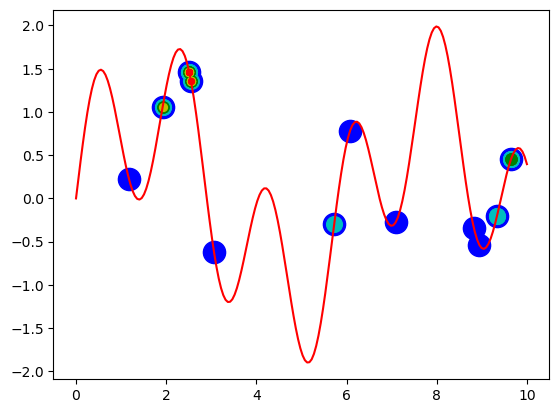

In [2]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

colors = ['b', 'c', 'g', 'y', 'r']

def rng(c, r):
    a = []
    for i in range(r):
        s = ''
        for j in range(c):
            s += ''+str(random.randint(0, 1))
        a.append(s)
    return a

def bin(n): #n = 255 (number)
    r = ''
    while n > 0:
        r = str(n & 1) + r
        n >>= 1
    return r

def dec(n): #n = '0110...10' (string)
    r = 0
    for i in range(len(n)):
        r += pow(2, i) * int(n[::-1][i])
    return r

def dec_list(n): #where n = ['01..10', ...] (array)
    a = []
    for i in n:
        a.append(dec(i))
    return a

def f(x):
    return math.sin(x) + math.sin( (10/3) * x)

def func_normalized(n, max_number, val=10, offset=0):
    return f(offset + ((n / max_number) * val))

def list_through_fnorm(n, max_number):
    a = []
    for i in n:
        a.append(func_normalized(i, max_number))
    return a

def normalize_list(n, max_number, val=10):
    a = []
    for i in n:
        a.append(val * i/max_number)
    return a

def draw_step(x1, y1, size, color):
    plt.scatter(x1, y1, color = color, s=size)
    print("Scattered ("+color+") with size "+str(size))

def process_weights(p):
    #p = np.array(p)
    if(np.min(p) < 0):
        offset = abs(np.min(p))
        #print("offsetting by "+str(offset))
        for i in range(len(p)):        
            #print(str(p[i])+" is now "+str(p[i] + offset))
            p[i] = p[i] + offset

    p = np.array(p)
    p /= p.sum()

    print("processed values: "+str(p))

    return p
    

def choose_random(list, weights):
    a = []
    
    weights = process_weights(weights)
    a = np.random.choice(list, len(list), p=weights)

    return a

def handle_crossing(n, p):
    if(random.range(0, 1) <= p):
        return n #skipping
    else:
        pairs = 2 * random.randint(len(n) // 2)
        print("Executing crossing with "+pairs+" randomly selected pairs!")

        

        a = np.random.choice 

def run(col, rows, times, crossing_probability=0.5, mutation_probability=0.01):
    print(bin(255))
    x = np.linspace(0, 10, 200)
    y = np.sin(x) + np.sin((10 * x) / 3)
    plt.plot(x, y, color='red')
    size = pow(2, 3 + times)
    
    max_number = dec(''+col*'1')
    list = rng(col, rows)
    list_decimal = dec_list(list)
    print("list (max is "+(''+col*'1')+"):\n"+str(list)+"\n\nlist decimal (max is "+ str(max_number) +"):\n"+str(list_decimal))

    for i in range(times):
        print("\nStep "+str(i+1)+".")
        color = colors[i % len(colors)]
        values = list_through_fnorm(list_decimal, max_number)
        list_normalized = normalize_list(list_decimal, max_number)

        df = pd.DataFrame()
        df['Data'] = list_normalized
        df['Values'] = values
        display(df)
        
        draw_step(list_normalized, values, size, color)
        size = size // 2

        list_decimal = choose_random(list_decimal, values)
        #handle_crossing(list_decimal, crossing_probability)
        #handle_mutation(list_decimal, mutation_probability)

    plt.show()
    
run(8, 12, 5)